In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cheenu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [40]:
# Functions

# getting the tokens from a given file.
def getTokens(filename):
    # reading the file and using word_tokenize
    f = open(filename, 'r', encoding="utf8")
    raw = f.read()
    f.close()
    return word_tokenize(raw)

def rmPunctLowerCase(tokens):
    return [token for token in tokens if token.isalpha()]

def getTypes(tokens):
    return list(set(tokens))

# using this function we get a list of tuples (word, freq) with sorting as ranks.
def getSortedFreq(tokens):
    # getting freq of each word
    fdist = FreqDist(tokens)
    return sorted(fdist.items(), key=lambda kv: kv[1], reverse=True)

def plotZipfRankFreq(freq):
    plt.scatter(range(1, len(freq) + 1), [int(word[1]) for word in freq], label = "Freq vs rank")
    plt.xlabel('Rank', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    
def plotZipfRankLength(freq):
    plt.plot([len(word[0]) for word in freq], [int(word[1]) for word in freq], label = "freq vs Length")
    plt.xlabel('Length', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)

def GetDataHeapsLaw(filename):
    f = open(filename, 'r', encoding="utf8")
    raw = f.readlines()
    f.close()
    tokens = []
    no_clean_tokens = []
    no_vocab = []
    for i in range (len(raw)):
        tokens.extend(word_tokenize(raw[i]))        
        clean_tokens = rmPunctLowerCase(tokens)
        no_clean_tokens.append(len(clean_tokens))
        no_vocab.append(len(set(clean_tokens)))
    return [no_clean_tokens, no_vocab]

In [41]:
# Part 1 (TTR ratio)

In [42]:
# finding the tokens
file = '../books/tom_sawyer.txt'
tokens = getTokens(file)
print ("Raw tokens #:", len(tokens))

# removing the tokens that are not alpha_numeric, lowering the case
clean_tokens = rmPunctLowerCase(tokens)
print ("Cleaned tokens #:", len(clean_tokens))

# finding the types
types = getTypes(clean_tokens)
print ("types #:", len(types))

# the ttr ratio comes out to be
print ("TTR ratio:", len(types)/len(clean_tokens))

Raw tokens #: 87867
Cleaned tokens #: 69860
types #: 7731
TTR ratio: 0.11066418551388492


In [43]:
# Part 2 (Zipf's Laws)

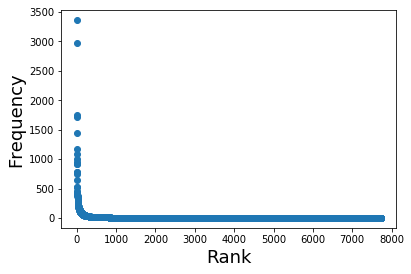

In [44]:
# getting ranks and frequencies.
freq = getSortedFreq(clean_tokens)
# plots the product of ranks and frequncies
plotZipfRankFreq(freq)

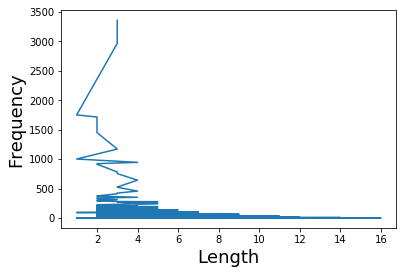

In [45]:
# plotting zipf's law for relation b/w freq and length
plotZipfRankLength(freq)

In [46]:
# plotting zipf's law for relation b/w freq and meaning
# not sure how to match meanings.

In [47]:
# plotting heap's law and fitted curve
fitting_data = GetDataHeapsLaw('../books/tom_sawyer.txt')

In [48]:
def plotData(data, l):
    plt.scatter(data[0], data[1], label = l)
    plt.xlabel('Token #', fontsize=18)
    plt.ylabel('Vocab #', fontsize=18)

SyntaxError: invalid syntax (<ipython-input-48-df41275ec10e>, line 1)

In [49]:
plotData(fitting_data, "tokens vs vocab (through data)")

NameError: name 'plotData' is not defined